# Naive Bayes Classifiers 

Let a discrete-valued features $x \in \{1,...,K\}^D$ where $K$ is the number of values for each feature and D is the number of features. We will use a generative approach. 

\begin{equation}
p(\boldsymbol{x}|y=c,\theta) = \prod_{j=1}^Dp(x_j|y=c,\theta_{jc})
\end{equation}


the resulting model is called a *Naive Bayes Classifier* (NBC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
D = 2 # numbers of features or the dimension of data
K = 2 # number of values for each feature
C = 4 # number of classes 

mu_d = np.random.randint(low=1,high=100,size=(C,2),dtype='int')
sigma_d = np.random.randint(low=0,high=20,size=(C,2),dtype='int')

print('means')
print(mu_d)
print('sigmas')
print(sigma_d)

means
[[79 57]
 [40 82]
 [25 22]
 [13 19]]
sigmas
[[ 8  0]
 [16 19]
 [ 9 16]
 [ 1 16]]


In [101]:
N = 1000 #number of samples
inputs = []
labels = []
for label, stats in enumerate(zip(mu_d, sigma_d)):
    mu    =  stats[0]
    sigma =  stats[1]
    feature_1 = np.random.normal(mu[0], sigma[0], N)
    feature_2 = np.random.normal(mu[1], sigma[1], N)
    data = np.column_stack((feature_1, feature_2))
    inputs.append(data)
    labels.append([label]*N)

In [124]:
Y = np.array(labels).flatten()
X = np.array(inputs)
X = X.reshape(-1, X.shape[-1])

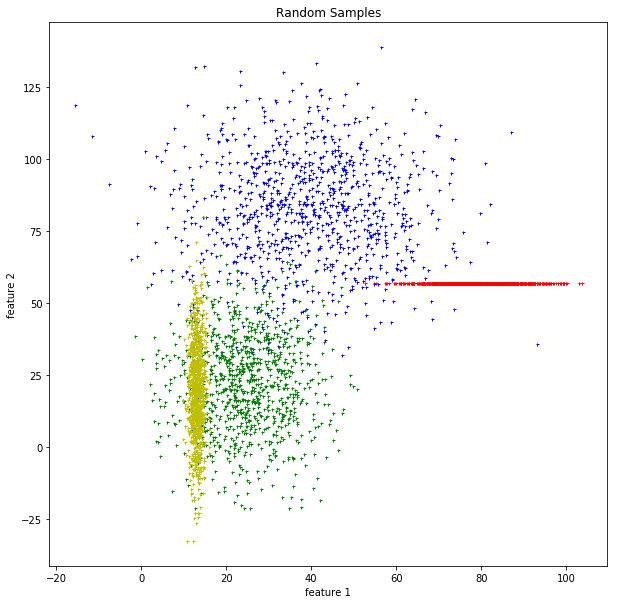

In [121]:
plt.figure(figsize=(10,10))
for x_, y_ in zip(X,Y):
    if y_ == 0:
        plt.plot(x_[0], x_[1], 'r+', markersize=3)
    if y_ == 1:
        plt.plot(x_[0], x_[1], 'b+', markersize=3)
    if y_ == 2:
        plt.plot(x_[0], x_[1], 'g+', markersize=3)
    if y_ == 3:
        plt.plot(x_[0], x_[1], 'y+', markersize=3)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Random Samples')
plt.show()

### Model Fitting

We now discuss how to train a naive Bayes classifier. This usually means computing the MLE or MAP estimate for the parameters. However, we will also discuss how to compute the full posterior, $p(\theta|D)$

In [128]:
from sklearn.utils import shuffle
X_, Y_ = shuffle(X,Y)
x_train = X_[0:700]
y_train = Y_[0:700]
x_test  = X_[700:]
y_test  = Y_[700:]

The probability for a single data case is given by 
\begin{equation}
p(x_i, y_i |\theta) \\
= p(y_i|\pi)\prod_jp(x_{ij}|\theta_j) \\
= \prod_c\pi_c^{\boldsymbol{1}{\{y_i = c\}}}\prod_j\prod_c p(x_ij|\theta_jc)^{\boldsymbol{1}\{y_i = c\}}
\end{equation}

Hence the log-likelihood is given by
\begin{equation}
log(p(D|\theta)) = \sum_{c=1}^CN_c\log{\pi_c}+\sum_{j=1}^D\sum_{c=1}^C\sum_{i:y_i=c}\log{p(x_{ij}|\theta_{jc}})
\end{equation}

We can see that this expression decomposes into a series of terms, obe concerning $\pi$ and $DC$ terms containing the $\theta_{jc}$'s. Hence we can optimize all these parameters separately.

\begin{equation}
\hat{\pi}_{c} = \frac{N_c}{N}
\end{equation}

where $N_c \doteq \sum_i \boldsymbol{1}(x_ij=1, y_i=c)$ is the number of examples in class $c$ where feature $j$ turns on.